In [1]:
import pandas as pd
import numpy as np

# Graph
import plotly.express as px
import matplotlib.pyplot as plt

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [2]:
path = r"D:\TRAVAIL\Inge_3\Projet - Prédiction du type d’application Internet dans le contexte de traffic chiffré\network_analysis\data\dataset_clean.csv"

In [3]:
TARGET = 'L7Protocol'

# Import df

In [4]:
df = pd.read_csv(path)

list_protocol = ["AMAZON", "MICROSOFT", "YOUTUBE", "GMAIL", "WINDOWS_UPDATE", "SKYPE", "FACEBOOK", "DROPBOX"]
df = df[df['ProtocolName'].isin(list_protocol)]
df = df.drop(
    ['Source.Port',
     'Destination.Port',
     'Protocol',
     'Flow.ID',
     'Source.IP',
     'Destination.IP',
     'ProtocolName'],   
    axis=1,
)

# X et y

In [5]:
y = df[TARGET]
X = df.drop([TARGET],axis=1)

In [6]:
y = y.to_numpy()

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = to_categorical(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Modèle

In [13]:
model = Sequential()

model.add(GRU(220, input_shape=(1,69), activation="relu", return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(220,activation="relu"))
model.add(Dense(y.shape[1], activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 1, 220)            192060    
                                                                 
 dropout_1 (Dropout)         (None, 1, 220)            0         
                                                                 
 gru_3 (GRU)                 (None, 220)               291720    
                                                                 
 dense_1 (Dense)             (None, 213)               47073     
                                                                 
Total params: 530,853
Trainable params: 530,853
Non-trainable params: 0
_________________________________________________________________


In [14]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", 
                                        patience = 3, 
                                        restore_best_weights = True)

In [15]:
history = model.fit(X_train, y_train, 
                    epochs = 200, 
                    validation_data= (X_test, y_test),
                    callbacks =[earlystopping])
history

Epoch 1/200
11797/11797 [==============================] - 105s 9ms/step - loss: 0.0091 - accuracy: 0.6355 - val_loss: 0.0065 - val_accuracy: 0.7066
Epoch 2/200
11797/11797 [==============================] - 103s 9ms/step - loss: 0.0065 - accuracy: 0.7086 - val_loss: 0.0059 - val_accuracy: 0.7359
Epoch 3/200
11797/11797 [==============================] - 99s 8ms/step - loss: 0.0060 - accuracy: 0.7332 - val_loss: 0.0056 - val_accuracy: 0.7499
Epoch 4/200
11797/11797 [==============================] - 100s 8ms/step - loss: 0.0057 - accuracy: 0.7463 - val_loss: 0.0054 - val_accuracy: 0.7597
Epoch 5/200
11797/11797 [==============================] - 105s 9ms/step - loss: 0.0055 - accuracy: 0.7555 - val_loss: 0.0052 - val_accuracy: 0.7690
Epoch 6/200
11797/11797 [==============================] - 107s 9ms/step - loss: 0.0053 - accuracy: 0.7629 - val_loss: 0.0051 - val_accuracy: 0.7737
Epoch 7/200
11797/11797 [==============================] - 106s 9ms/step - loss: 0.0052 - accuracy: 0.7681 

In [16]:
accuracy = model.evaluate(X_test, y_test)
accuracy

2950/2950 [==============================] - 9s 3ms/step - loss: 0.0042 - accuracy: 0.8175


[0.004188035614788532, 0.8174968957901001]

In [17]:
# Note : evolution de l'accuracy
# 0.7215 -> 0.7853 -> 0.7903

# Graph

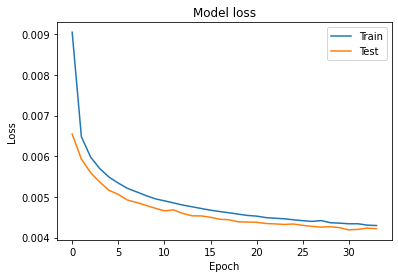

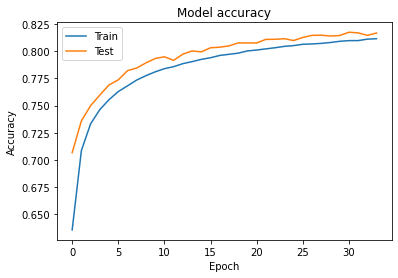

In [18]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])